<a href="https://colab.research.google.com/github/shreyash321/Speech_to_Text/blob/main/speech_to_text_using_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text To Speech

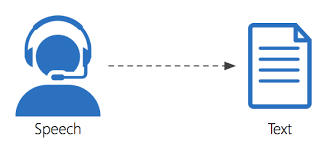

Pretrained Model Used From Hugging Face ❤: -
https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english 

In [ ]:
pip install transformers

In [7]:
import torch
import time
import librosa 
import numpy as np
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
MODEL_ID = "jonatasgrosman/wav2vec2-large-xlsr-53-english"
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)
#convert the audio file to a numpy array 
##
speech_array, sampling_rate = librosa.load('/content/AUD-20220831-WA0003', sr=16_000) #insert your audio file here
speech_array=speech_array.astype(np.double)
inputs = processor(speech_array, sampling_rate=16_000, return_tensors="pt", padding=True)
time.sleep(10)
with torch.no_grad():
    logits = model(inputs.input_values, attention_mask=inputs.attention_mask).logits
#prediction time
##
predicted_ids = torch.argmax(logits, dim=-1)
predicted_sentences = processor.batch_decode(predicted_ids)
print(predicted_sentences)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


['president trump has a meeting at washington at ten am']


In [9]:
#extracting entities from a sentence using spacy
import spacy
from spacy import displacy
NER = spacy.load("en_core_web_sm")
text1=NER(str(predicted_sentences))
for word in text1.ents:
    print(word.text,word.label_)
displacy.render(text1,style="ent",jupyter=True)

washington GPE
